In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
train=pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Data Exploration
Checking whether if there is any missing value.

In [2]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [3]:
train.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [4]:
train.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [5]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

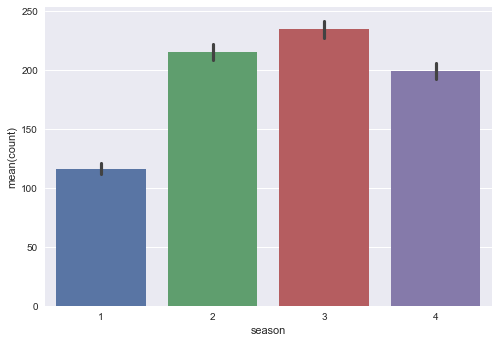

In [6]:
sns.barplot(x='season', y='count', data=train)

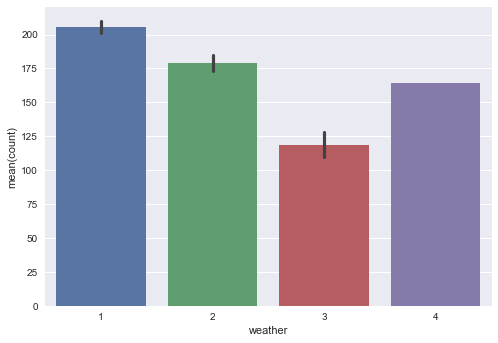

In [7]:
sns.barplot(x='weather', y='count', data=train)

In [31]:
train[['count', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by = 'count')

,count
holiday,
1,185.877814
0,191.741655


In [30]:
train[['count', 'season']].groupby(['season'], as_index = True).mean().sort_values(by = 'count')

,count
season,
1,116.343261
4,198.988296
2,215.251372
3,234.417124


Well, we have a datetime object here, so it's better to break them into hour, day, month, year and make them a separate column.
Further, found in the year column, there are just 2 different years 2011,2012 so using map(), I converted 2011 and 2012 to 0 and 1 respectively.Because most of the other columns like season, holiday, weather and working day are in the form of 0,1,2,3.

In [8]:
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})

It's time to divide our training data in the form of features and target separately.

In [ ]:
X, y = train.iloc[:, 1:], train['count']

It was seen from the training data sum of registered column and casual column yields count.
It was unnecessary to keep these two columns as our features, Machine learning learners can be more fruitful if dataset is free of useless columns.

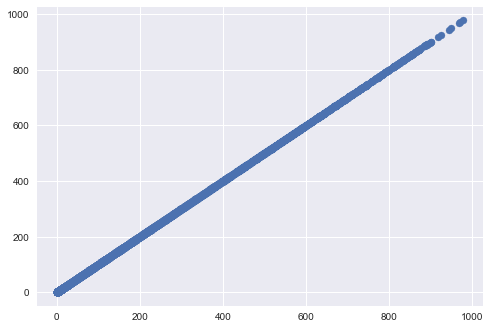

In [33]:
plt.scatter(x = train['casual'] + train['registered'], y = train['count'])
plt.show()

In [10]:
X = X.drop(['registered', 'casual', 'count'], axis=1)

# Applying machine learning models
Splitting into training and test set using scikit's train_test_split package

In [11]:
from sklearn.cross_validation import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

C:\Users\Architect_shwet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Features on larger scales can unduly influence the model.
We want features on a similar scale.
Scikit's preprocessing provides us with StandardScaler package to scale our data.

In [12]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train_std = scl.fit_transform(X_train)
X_test_std = scl.transform(X_test)

I used RandomForestRegressor model with fitting on the training data and predicting on the test data.

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(X_train_std, y_train)
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.150
RMSLE test: 0.337
R2 train: 0.993
R2 test: 0.944


Further, I tried using DecisionTreeRegressor model but it's performance was not better than  RandomForestRegressor model.

In [15]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train_std, y_train)
y_train_pred2 = clf.predict(X_train_std)
y_test_predd = clf.predict(X_test_std)
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred2 + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_predd + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred2))
print('R2 test: %.3f' % r2_score(y_test, y_test_predd))

RMSLE train: 0.011
RMSLE test: 0.443
R2 train: 1.000
R2 test: 0.881


# Similar approach is done on the competition given test data.

In [16]:
test=pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


Simlarly, I converted datatime object to hour,day,month,year

In [17]:
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})

In [18]:
X_test=test.iloc[:,1:]

Similarly,I used same standarad scaler for test data

In [19]:
X_test = scl.transform(X_test)

In [20]:
y_test=forest.predict(X_test)

In [21]:
df_submit = test

In [22]:
df_submit['count'] = np.round(y_test)

In [23]:
df_submit = df_submit.drop(['season', 'holiday', 'workingday','weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year'], axis=1)

In [24]:
df_submit.head()

,datetime,count
0,2011-01-20 00:00:00,12.0
1,2011-01-20 01:00:00,6.0
2,2011-01-20 02:00:00,4.0
3,2011-01-20 03:00:00,4.0
4,2011-01-20 04:00:00,3.0


In [25]:
df_submit.to_csv('bike2.csv', index=False)